In [27]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import PIL
import pandas as pd
from libtiff import TIFF

import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

from keras.applications import ResNet50

In [28]:
# hi

In [29]:
data_dir = "/home/mq_khan/datasets/eurosat"
new_data = "/home/fatima_tuz_zehra/Dataset/euro-rgb-new"

In [30]:
labels = os.listdir(data_dir)
labels

['HerbaceousVegetation',
 'Highway',
 'SeaLake',
 'Forest',
 'River',
 'Pasture',
 'PermanentCrop',
 'Industrial',
 'Residential',
 'AnnualCrop']

In [31]:
freq = dict()
for label in labels:
    imgs = os.listdir(data_dir + "/" + label)
    freq[label] = len(imgs)
    
freq

{'HerbaceousVegetation': 3000,
 'Highway': 2500,
 'SeaLake': 3000,
 'Forest': 3000,
 'River': 2500,
 'Pasture': 2000,
 'PermanentCrop': 2500,
 'Industrial': 2500,
 'Residential': 3000,
 'AnnualCrop': 3000}

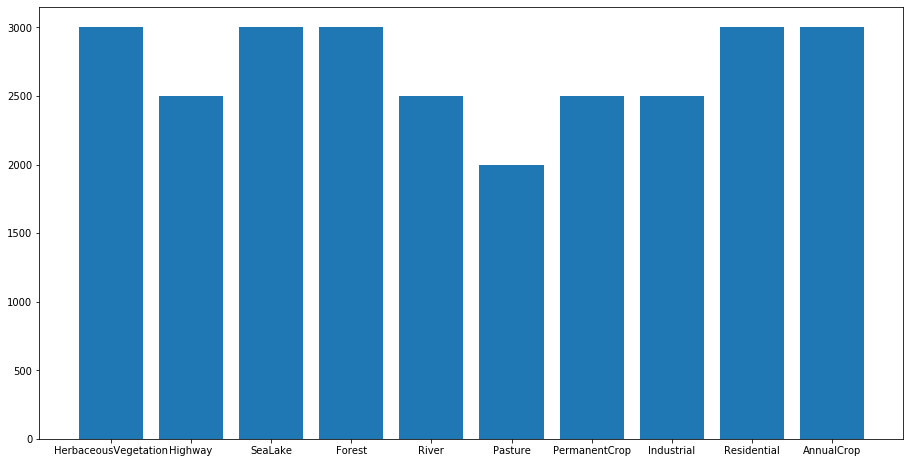

In [32]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(freq.keys(),freq.values())
plt.show()

In [77]:
train = new_data + "/train"
test = new_data + "/test"
val = new_data + "/val"
for label in labels:
    
    if not os.path.exists(os.path.join(train, label)):
        os.mkdir(os.path.join(train, label))

    if not os.path.exists(os.path.join(test, label)):
        os.mkdir(os.path.join(test, label))
        
    if not os.path.exists(os.path.join(val, label)):
        os.mkdir(os.path.join(val, label))
        
    

In [78]:
data = {}

for l in labels:
    for img in os.listdir(data_dir+'/'+l):
        data.update({os.path.join(data_dir, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.12, random_state=69)




In [79]:
X

0        /home/mq_khan/datasets/eurosat/HerbaceousVeget...
1        /home/mq_khan/datasets/eurosat/HerbaceousVeget...
2        /home/mq_khan/datasets/eurosat/HerbaceousVeget...
3        /home/mq_khan/datasets/eurosat/HerbaceousVeget...
4        /home/mq_khan/datasets/eurosat/HerbaceousVeget...
                               ...                        
26995    /home/mq_khan/datasets/eurosat/AnnualCrop/Annu...
26996    /home/mq_khan/datasets/eurosat/AnnualCrop/Annu...
26997    /home/mq_khan/datasets/eurosat/AnnualCrop/Annu...
26998    /home/mq_khan/datasets/eurosat/AnnualCrop/Annu...
26999    /home/mq_khan/datasets/eurosat/AnnualCrop/Annu...
Length: 27000, dtype: object

In [80]:
var = []
for train_idx, test_idx in split.split(X, y):
    
    var = train_idx
print(var)

[23658 15578 17274 ... 21769  8228 22397]


In [81]:
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]
    print(train_paths[0])

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('/home/mq_khan/datasets/eurosat', train, i) for i in train_paths]
    new_test_paths = [re.sub('/home/mq_khan/datasets/eurosat', test, i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

  7%|▋         | 1733/23760 [00:00<00:01, 17326.51it/s]

/home/mq_khan/datasets/eurosat/HerbaceousVegetation/HerbaceousVegetation_1566.jpg
moving training files..


100%|██████████| 3240/3240 [00:00<00:00, 17154.88it/s]

moving testing files..


In [82]:
shutil.rmtree(train)

In [83]:
os.mkdir(train)

In [84]:
for label in labels:
    
    if not os.path.exists(os.path.join(train, label)):
        os.mkdir(os.path.join(train, label))


In [85]:
d_val = {}
for i in range(len(X[var])):
    d_val.update({X[var[i]]:list(data.values())[var[i]]})

x_v = pd.Series(list(d_val.keys()))
y_v = pd.get_dummies(pd.Series(d_val.values()))

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.136, random_state=69)

for train_idx, val_idx in split2.split(x_v, y_v):
    
    train_paths = x_v[train_idx]
    val_paths = x_v[val_idx]

    
    new_train_paths = [re.sub('/home/mq_khan/datasets/eurosat', train, i) for i in train_paths]
    new_val_paths = [re.sub('/home/mq_khan/datasets/eurosat', val, i) for i in val_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    val_path_map = list((zip(val_paths, new_val_paths)))
    
    # move the files
    print("moving training files..")
    
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    
    
    print("moving validation files..")
    for i in tqdm(val_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])




 17%|█▋        | 3412/20528 [00:00<00:01, 17082.80it/s]

moving training files..


100%|██████████| 3232/3232 [00:00<00:00, 17284.41it/s]

moving validation files..


In [86]:
os.listdir(val + "/Forest" )

['Forest_1388.jpg',
 'Forest_1977.jpg',
 'Forest_1480.jpg',
 'Forest_1774.jpg',
 'Forest_1442.jpg',
 'Forest_1182.jpg',
 'Forest_1658.jpg',
 'Forest_8.jpg',
 'Forest_211.jpg',
 'Forest_1428.jpg',
 'Forest_1542.jpg',
 'Forest_26.jpg',
 'Forest_569.jpg',
 'Forest_2746.jpg',
 'Forest_1672.jpg',
 'Forest_1937.jpg',
 'Forest_1089.jpg',
 'Forest_23.jpg',
 'Forest_1494.jpg',
 'Forest_2831.jpg',
 'Forest_2958.jpg',
 'Forest_1544.jpg',
 'Forest_2903.jpg',
 'Forest_189.jpg',
 'Forest_616.jpg',
 'Forest_2675.jpg',
 'Forest_1172.jpg',
 'Forest_972.jpg',
 'Forest_2472.jpg',
 'Forest_2655.jpg',
 'Forest_1631.jpg',
 'Forest_1924.jpg',
 'Forest_678.jpg',
 'Forest_2013.jpg',
 'Forest_302.jpg',
 'Forest_926.jpg',
 'Forest_1876.jpg',
 'Forest_15.jpg',
 'Forest_2513.jpg',
 'Forest_146.jpg',
 'Forest_2821.jpg',
 'Forest_658.jpg',
 'Forest_823.jpg',
 'Forest_269.jpg',
 'Forest_1580.jpg',
 'Forest_2698.jpg',
 'Forest_341.jpg',
 'Forest_1986.jpg',
 'Forest_2452.jpg',
 'Forest_1192.jpg',
 'Forest_1472.jpg',
 '

In [87]:
train_generator_obj = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

train_generator = train_generator_obj.flow_from_directory(
    directory=train,
    target_size=(64, 64),
    batch_size= 32,
    class_mode= 'categorical',
    color_mode='rgb',
    shuffle=True,
    seed=69
)


val_generator_obj = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)


valid_generator = val_generator_obj.flow_from_directory(
    directory=val,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    seed=69
)



test_generator = ImageDataGenerator(
    rescale=1/255,
)

test_generator = test_generator.flow_from_directory(
    directory=test,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 20528 images belonging to 10 classes.
Found 3232 images belonging to 10 classes.
Found 3240 images belonging to 10 classes.


In [88]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [89]:
def get_model(lr, tune = None):
    resnet = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=(64,64,3))
    model = resnet.output
    model = Flatten()(model)
    model = Dense(2048, activation='relu')(model)
    model = Dropout(0.2)(model)

    output = Dense(len(labels), activation='softmax')(model)

    model = Model(inputs=resnet.input, outputs=output)
    
    if(tune == 0):
        for layer in resnet.layers:
            layer.trainable = True
            
    else:
        for layer in resnet.layers:
            layer.trainable = False
        

    model.compile(optimizer=Adam(lr = lr), loss='categorical_crossentropy',
                     metrics=['categorical_accuracy'])
    return model

In [90]:
res = get_model(lr = 1e-3)
step_size = train_generator.samples//32
val_step = valid_generator.samples//32

train_generator.reset()
test_generator.reset()



In [91]:
checkpoint = ModelCheckpoint(filepath = new_data + '/best.hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=4,
                           restore_best_weights=True,
                           mode='max')


history = res.fit(train_generator,
                             steps_per_epoch=step_size,
                             epochs = 12,callbacks=[early_stop, checkpoint],
                           validation_data=valid_generator,
                             validation_steps=val_step)

Epoch 1/12
641/641 [==============================] - ETA: 0s - loss: 1.8742 - categorical_accuracy: 0.3033
Epoch 00001: val_categorical_accuracy improved from -inf to 0.34777, saving model to /home/fatima_tuz_zehra/Dataset/euro-rgb-new/best.hdf5
641/641 [==============================] - 30s 46ms/step - loss: 1.8742 - categorical_accuracy: 0.3033 - val_loss: 1.6362 - val_categorical_accuracy: 0.3478
Epoch 2/12
641/641 [==============================] - ETA: 0s - loss: 1.6227 - categorical_accuracy: 0.3807
Epoch 00002: val_categorical_accuracy improved from 0.34777 to 0.42512, saving model to /home/fatima_tuz_zehra/Dataset/euro-rgb-new/best.hdf5
641/641 [==============================] - 46s 72ms/step - loss: 1.6227 - categorical_accuracy: 0.3807 - val_loss: 1.5604 - val_categorical_accuracy: 0.4251
Epoch 3/12
641/641 [==============================] - ETA: 0s - loss: 1.5608 - categorical_accuracy: 0.4090
Epoch 00003: val_categorical_accuracy did not improve from 0.42512
641/641 [=====

In [92]:
step_size = train_generator.samples//32
val_step = valid_generator.samples//32


resnet50 = get_model(1e-4,0)

resnet50.load_weights(new_data + '/best.hdf5')

train_generator.reset()
test_generator.reset()

resnet50_history = resnet50.fit_generator(train_generator,
                             steps_per_epoch=step_size,
                             epochs=17,
                             callbacks=[early_stop, checkpoint],
                             validation_data=valid_generator,
                             validation_steps=val_step)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/17
641/641 [==============================] - ETA: 0s - loss: 1.1333 - categorical_accuracy: 0.7810
Epoch 00001: val_categorical_accuracy did not improve from 0.51949
641/641 [==============================] - 70s 109ms/step - loss: 1.1333 - categorical_accuracy: 0.7810 - val_loss: 26.9155 - val_categorical_accuracy: 0.0489
Epoch 2/17
641/641 [==============================] - ETA: 0s - loss: 0.3628 - categorical_accuracy: 0.8852
Epoch 00002: val_categorical_accuracy improved from 0.51949 to 0.90223, saving model to /home/fatima_tuz_zehra/Dataset/euro-rgb-new/best.hdf5
641/641 [==============================] - 74s 115ms/step - loss: 0.3628 - categorical_accuracy: 0.8852 - val_loss: 0.2779 - val_categorical_accuracy: 0.9022
Epoch 3/17
641/641 [==============================] - ETA: 0s - loss: 0.2691 - categorical_accuracy: 0.9095
Epoch 00003: val_categorical_accuracy improved from 0.90223 to 0.92946, sa

In [93]:
resnet50_history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

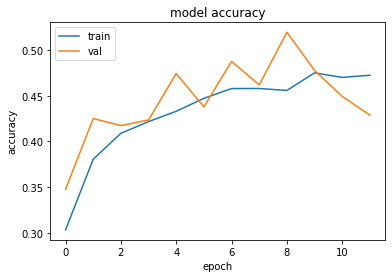

In [94]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [96]:
eval_test = resnet50.evaluate(test_generator)

102/102 [==============================] - 3s 26ms/step - loss: 0.1394 - categorical_accuracy: 0.9577
